In [1]:
!git clone https://github.com/amnatasneem/machine-learning-fall-2023-final-project.git

Cloning into 'machine-learning-fall-2023-final-project'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 38 (delta 11), reused 22 (delta 3), pack-reused 0
Receiving objects: 100% (38/38), 39.76 KiB | 1.42 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
!pip install scikeras

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
heart_data = pd.read_csv('/content/machine-learning-fall-2023-final-project/data/heart.csv', sep=",")
o2_data = pd.read_csv("/content/machine-learning-fall-2023-final-project/data/o2Saturation.csv")

In [5]:
heart_data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
o2_data.head(10)

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
5,97.5
6,97.5
7,97.5
8,97.5
9,97.5


In [7]:
# Classification: heart attack prediction
# Target column index = 13 ("output")
X_classification = heart_data.drop(heart_data.columns[13], axis=1)
y_classification = heart_data[heart_data.columns[13]]

# Split the data (train and test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=50
)

In [8]:
# Standardize features
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

In [9]:
# Logistic regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_class_scaled, y_train_class)
y_pred_labels = log_reg_model.predict(X_test_class_scaled)

In [10]:
# Print classification results
print("Logistic Regression - Classification Results: ")
print(classification_report(y_test_class, y_pred_labels))

Logistic Regression - Classification Results: 
              precision    recall  f1-score   support

           0       0.80      0.64      0.71        25
           1       0.78      0.89      0.83        36

    accuracy                           0.79        61
   macro avg       0.79      0.76      0.77        61
weighted avg       0.79      0.79      0.78        61



In [11]:
# Neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim=X_train_class_scaled.shape[1], activation="relu"),
    tf.keras.layers.Dense(16, input_dim=X_train_class_scaled.shape[1], activation="relu"),
    tf.keras.layers.Dense(32, input_dim=X_train_class_scaled.shape[1], activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
model.fit(X_train_class_scaled, y_train_class, epochs=10, batch_size=32, verbose=0)

# Evaluate model on test set
y_pred_class = model.predict(X_test_class_scaled)
y_pred_labels = (y_pred_class > 0.5).astype(int)

2/2 [==============================] - 0s 5ms/step


Neural Network - Classification Results:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64        25
           1       0.76      0.69      0.72        36

    accuracy                           0.69        61
   macro avg       0.68      0.69      0.68        61
weighted avg       0.70      0.69      0.69        61



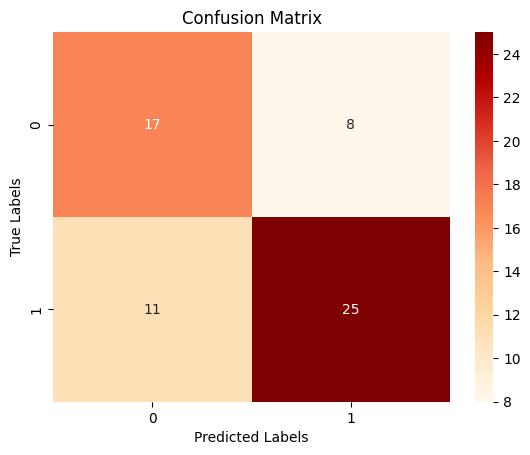

In [12]:
# Print neural network classification results
print("Neural Network - Classification Results:")
print(classification_report(y_test_class, y_pred_labels))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Regression: O2 saturation (X) and if a heart attack occurred (y)
extra = o2_data.drop(o2_data.columns[0], axis=1)

# Convert the Series to a NumPy array and reshape
X_regression = o2_data[o2_data.columns[0]].head(303).values.reshape(-1, 1)

y_regression = heart_data[heart_data.columns[13]]

In [14]:
# Split the data (train and test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=50
)

In [15]:
# Standardize features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [16]:
# For regression, we will try out three different models:
# 2d polynomial regression, neural network regression, and random forest regression

In [17]:
# 2D Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_reg_poly = poly.fit_transform(X_train_reg_scaled)
X_test_reg_poly = poly.transform(X_test_reg_scaled)

# Train linear regression on polynomial features
poly_reg_model = LinearRegression().fit(X_train_reg_poly, y_train_reg)
y_pred_reg_poly = poly_reg_model.predict(X_test_reg_poly)

# Print regression results for Polynomial Regression
print("\n2D Polynomial Regression - Results:")
print("Residual sum of squares:", mean_squared_error(y_test_reg, y_pred_reg_poly))
# Explained variance score: 1 is perfect prediction
print("Variance score:", poly_reg_model.score(X_test_reg_poly, y_test_reg))

y_predicted = poly_reg_model.predict(X_test_reg_poly)
R_square = r2_score(y_predicted, y_test_reg)
print('Coefficient of Determination', R_square)


2D Polynomial Regression - Results:
Residual sum of squares: 0.21266613218884292
Variance score: 0.12074369125035056
Coefficient of Determination -6.396215461825425


In [18]:
# Interpretation:
# Residual Sum of Squares: low is good - model is making predictions close to the actual values.
# Variance Score (R-squared): low - suggests that model may not be explaining much of the variance in the target variable.
# Coefficient of Determination: negative is unusual - not capturing the pattern in the data at all.
# Come back to this model

In [19]:
# Neural network regression
def create_reg_nn_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train_reg.shape[1], activation="relu"))
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

nn_reg_model = create_reg_nn_model()
nn_reg_model.fit(X_train_reg, y_train_reg, epochs=10, batch_size=32, verbose=0)
y_pred_reg_nn = nn_reg_model.predict(X_test_reg)

# Print regression results for Neural Network
print("\nNeural Network Regression - Results:")
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg_nn))

2/2 [==============================] - 0s 3ms/step

Neural Network Regression - Results:
Mean Squared Error: 3509.6935489883103


In [25]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_class, y_train_class)

y_pred = rf_model.predict(X_test_class)
mse = mean_squared_error(y_test_class, y_pred)
r2 = r2_score(y_test_class, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

cv_scores = cross_val_score(rf_model, X_classification, y_classification, cv=5)
print(f"Cross-validated R-squared: {cv_scores.mean()}")

Mean Squared Error: 0.1508139344262295
R-squared: 0.3764681666666667
Cross-validated R-squared: 0.06995887596899228
